# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, how = "left", on = "Mouse ID")


# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [75]:
# Checking the number of mice.
print(f"Number of unique mice: {len(merged_df['Mouse ID'].unique())}")

Number of unique mice: 249


In [76]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
import numpy as np

mod_mouse_study_data_df = merged_df.loc[(merged_df["Timepoint"] == 0), :]

dup_mouse_id = mod_mouse_study_data_df.loc[(mod_mouse_study_data_df["Mouse ID"] == "g989"), :]
dup_mouse_id["Mouse ID"].unique()

array(['g989'], dtype=object)

In [77]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = merged_df[merged_df["Mouse ID"] == "g989"]
dup_mouse_study_data_df = merged_df.loc[(merged_df["Mouse ID"] == "g989"), :]
dup_mouse_study_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [78]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dup_drop_mouse_study_data_df = mod_mouse_study_data_df.loc[(mod_mouse_study_data_df["Mouse ID"] != "g989"), :]
clean_mouse_data_df = dup_drop_mouse_study_data_df
clean_mouse_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [81]:
# Checking the number of mice in the clean DataFrame.
print("Number of mice :"+str( len(clean_mouse_data_df["Mouse ID"])))

Number of mice :248


## Summary Statistics

In [82]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mouse_study_data_df_copy = merged_df.copy()
drug_name = mouse_study_data_df_copy.set_index("Drug Regimen").groupby("Drug Regimen")

mean_tumor_vol = mouse_study_data_df_copy.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean().astype(float)

med_tumor_vol = mouse_study_data_df_copy.groupby("Drug Regimen")["Tumor Volume (mm3)"].median().astype(float)

var_tumor_vol = mouse_study_data_df_copy.groupby("Drug Regimen")["Tumor Volume (mm3)"].var().astype(float)

stddev_tumor_vol = mouse_study_data_df_copy.groupby("Drug Regimen")["Tumor Volume (mm3)"].std().astype(float)

stderr_tumor_vol = mouse_study_data_df_copy.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem().astype(float)

mouse_study_summary = pd.DataFrame({"Mean Tumor Volume": mean_tumor_vol,
                                    "Median Tumor Volume": med_tumor_vol,
                                    "Tumor Volume Variance": var_tumor_vol,
                                    "Tumor Volume Std. Dev.": stddev_tumor_vol,
                                    "Tumor Volume Std. Err.": stderr_tumor_vol})

mouse_study_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [83]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_mouse_study_summary = mouse_study_data_df_copy.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
agg_mouse_study_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

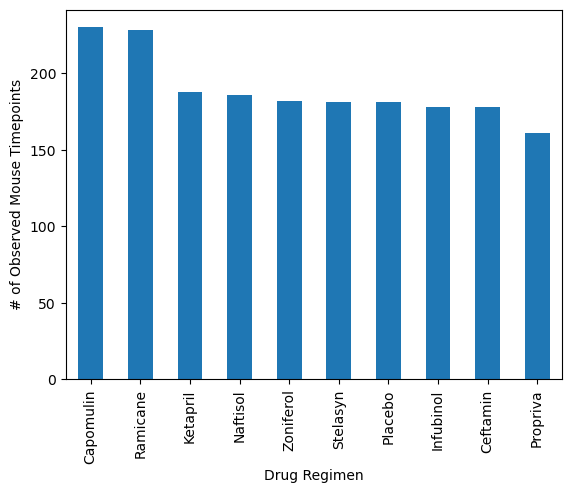

In [86]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_pandas_bar = merged_df["Drug Regimen"].value_counts().plot(kind = "bar")
mouse_pandas_bar.set_xlabel("Drug Regimen")
mouse_pandas_bar.set_ylabel("# of Observed Mouse Timepoints")
plt.show()

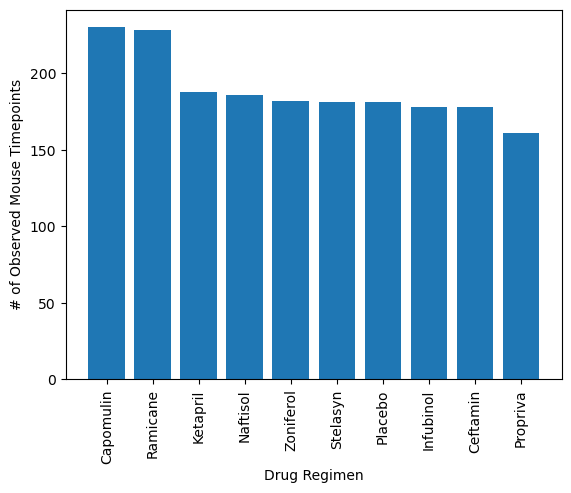

In [87]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
total_drugs_arr = merged_df["Drug Regimen"].value_counts().to_dict()

plt.bar(total_drugs_arr.keys(), total_drugs_arr.values(), align = "center")
plt.xticks(rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

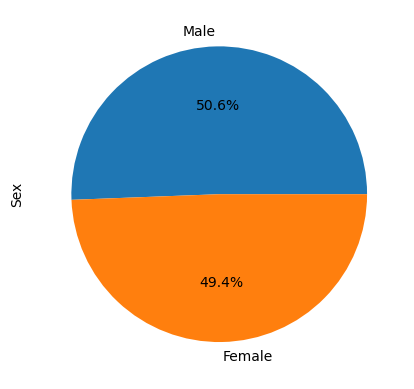

In [88]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_pandas_pie = merged_df["Sex"].value_counts().plot(kind = "pie", autopct = "%1.1f%%")
mouse_pandas_pie.set_ylabel("Sex")
plt.show()

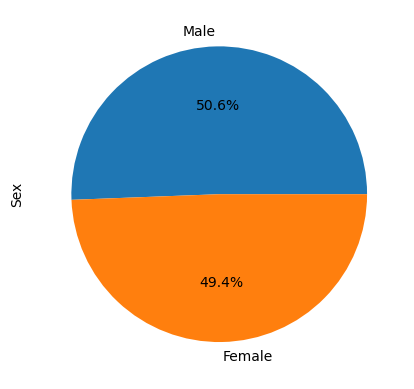

In [89]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
total_gender = merged_df["Sex"].value_counts().to_dict()

plt.pie(total_gender.values(), labels = total_gender.keys(), autopct = "%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [90]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_study_data_df_copy_copy = merged_df.copy()
mouse_check = mouse_study_data_df_copy_copy.loc[(mouse_study_data_df_copy_copy["Mouse ID"] == "a203"), :]
mouse_check


id_mouse_df = mouse_study_data_df_copy_copy.groupby("Mouse ID")["Mouse ID"].unique()
timepoint_mouse_df = mouse_study_data_df_copy_copy.groupby("Mouse ID")["Timepoint"].max()

greatest_timepoint_mouse_df = pd.DataFrame({"Timepoint": timepoint_mouse_df})
greatest_timepoint_mouse_df.reset_index()

merged_mouse_df = pd.merge(greatest_timepoint_mouse_df, merged_df, how = "left", on = ["Mouse ID", "Timepoint"])
merged_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [104]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_mouse_data = merged_mouse_df.loc[(merged_mouse_df["Drug Regimen"] == drug), :]["Tumor Volume (mm3)"]
    
    # add subset 
    q1 = drug_mouse_data.quantile(0.25)
    q3 = drug_mouse_data.quantile(0.75)
    
    iqr = q3 - q1
    
    lowerb = q1 - 1.5 * iqr
    upperb = q3 + 1.5 * iqr 
    
    # Determine outliers using upper and lower bounds
    outlier = drug_mouse_data[((drug_mouse_data < lowerb) | (drug_mouse_data > upperb))]    
    
    print(f"{drug}'s potential outliers: {outlier}")
    
    
    


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


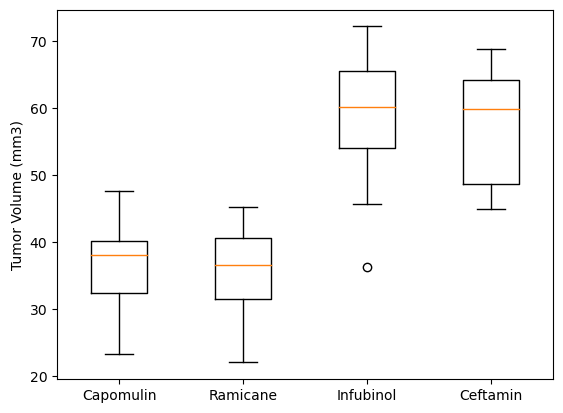

In [108]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
import matplotlib.pyplot as plt

# Create a list of tumor volume values for each treatment group
capomulin_vols = merged_mouse_df.loc[merged_mouse_df['Drug Regimen'] == 'Capomulin', 'Tumor Volume (mm3)']
ramicane_vols = merged_mouse_df.loc[merged_mouse_df['Drug Regimen'] == 'Ramicane', 'Tumor Volume (mm3)']
infubinol_vols = merged_mouse_df.loc[merged_mouse_df['Drug Regimen'] == 'Infubinol', 'Tumor Volume (mm3)']
ceftamin_vols = merged_mouse_df.loc[merged_mouse_df['Drug Regimen'] == 'Ceftamin', 'Tumor Volume (mm3)']

# Combine the tumor volume values into a list
tumor_vols = [capomulin_vols, ramicane_vols, infubinol_vols, ceftamin_vols]

# Create a box plot
fig, ax = plt.subplots()
ax.boxplot(tumor_vols, labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

ax.set_ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

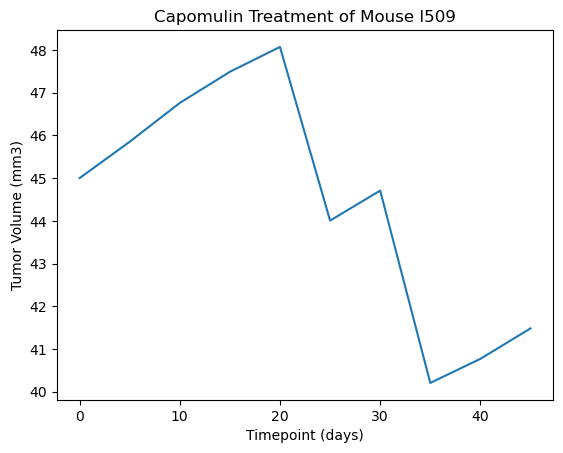

In [99]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_drug_df = merged_df.loc[(merged_df["Drug Regimen"] == "Capomulin"), :]
mouse_l509 = capomulin_drug_df.loc[(capomulin_drug_df["Mouse ID"] == "l509"), :]

mouse_l509_timepoint = mouse_l509["Timepoint"]
mouse_l509_tumor_vol = mouse_l509["Tumor Volume (mm3)"]

plt.plot(mouse_l509_timepoint, mouse_l509_tumor_vol)
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

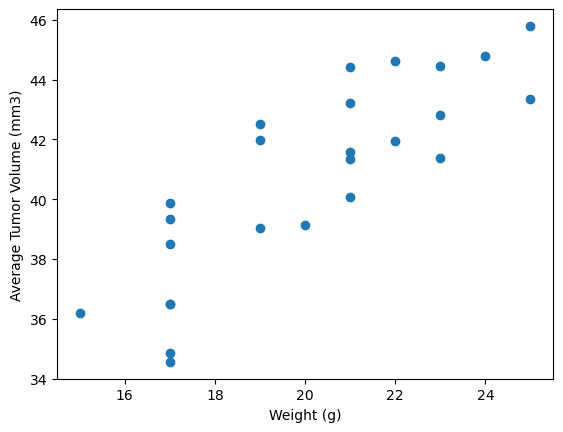

In [100]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_weight = capomulin_drug_df.groupby("Mouse ID")["Weight (g)"].mean()
avg_tumor_vol = capomulin_drug_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight
avg_tumor_vol

plt.scatter(mouse_weight, avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


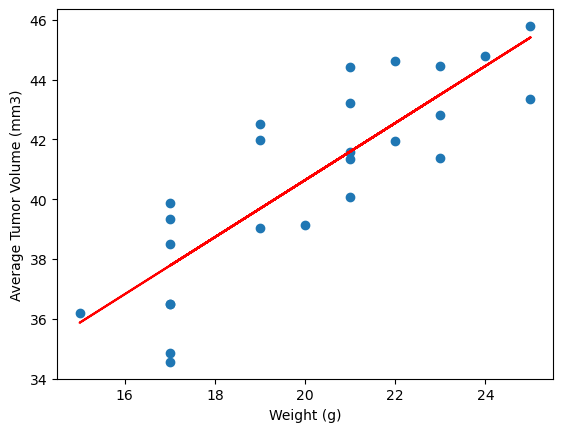

In [102]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_weight = capomulin_drug_df.groupby("Mouse ID")["Weight (g)"].mean()
avg_tumor_vol = capomulin_drug_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight
avg_tumor_vol

plt.scatter(mouse_weight, avg_tumor_vol)
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, avg_tumor_vol)
line_regression_val = (mouse_weight * slope) + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(mouse_weight, line_regression_val, "r-")


plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


print(f"The correlation between mouse weight and the average tumor volume is {rvalue:,.2f}.")
plt.show()